# Fatality Rate

To calculate fatality rate we combine P.D. (Property Damage) only and the Non-fatal injury as an effective Non-fatal injury class reducing the dataset to a binary class problem.

In [2]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

# Load data

In [3]:
df = pd.read_csv('../data/clean_data.csv')
print("Data size", df.shape)

Data size (104384, 19)


# Binary class

In [4]:
df.collision_classification = df.collision_classification.replace('03 - P.D. only', '02 - Non-fatal injury').\
replace('02 - Non-fatal injury', 'Non-fatal injury')

df.collision_classification = df.collision_classification.map({'01 - Fatal injury': 1, 'Non-fatal injury': 0})

In [9]:
df.collision_classification.value_counts()*100/len(df)

0    99.835224
1     0.164776
Name: collision_classification, dtype: float64

# 1. Fatality rate by year

Most fatal accidents occur in 2014 by approaching impact type

Text(0.5, 0, 'Fatality rate')

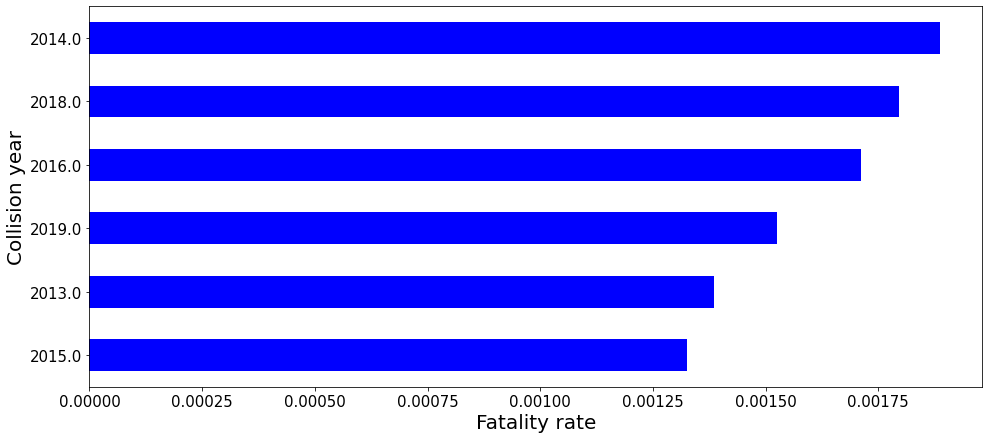

In [6]:
grp = df.groupby('collision_year')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Collision year', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 

Text(0.5, 1.0, 'Fatality rate by month')

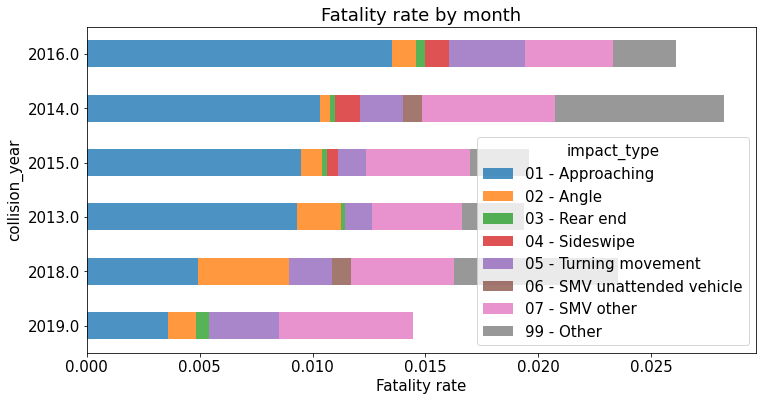

In [7]:
pvt = df.pivot_table('collision_classification', index = 'collision_year',
                         columns = 'impact_type', aggfunc = 'mean')
pvt.sort_values(by =['01 - Approaching']).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Fatality rate')
plt.title('Fatality rate by month')

# 2. Fatality rate by month

Most fatal accidents occur by August and July around 4 p.m. which is the summer period

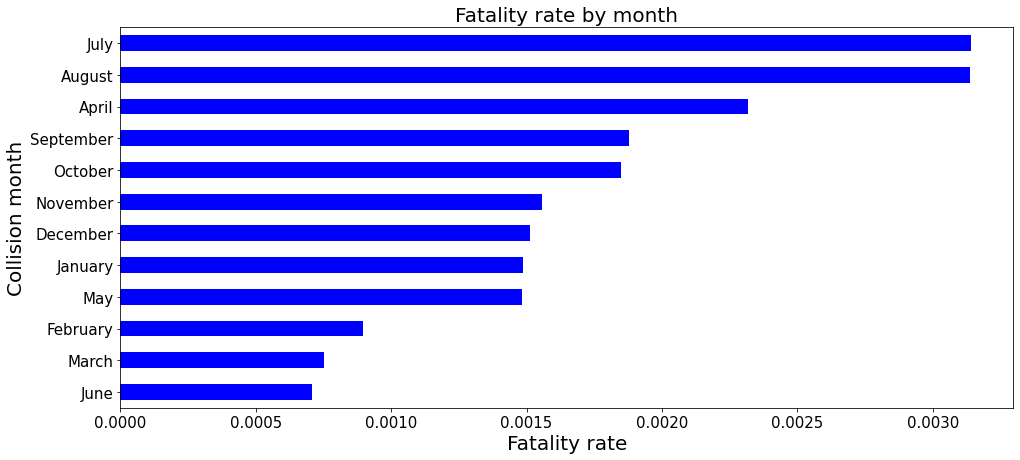

In [8]:
grp = df.groupby('collision_month')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Collision month', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 
plt.title('Fatality rate by month', fontsize=20)
plt.savefig('../image/fatality_by_month.png')

Text(0.5, 1.0, 'Fatality rate by month')

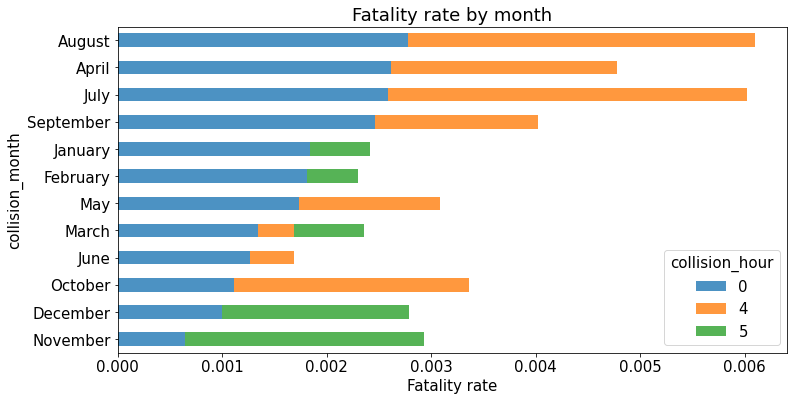

In [9]:
pvt = df.pivot_table('collision_classification', index = 'collision_month',
                         columns = 'collision_hour', aggfunc = 'mean')
pvt.sort_values(by =[0]).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Fatality rate')
plt.title('Fatality rate by month')

# 3. Fatality rate by day
Most fatal accidents occur by Sundays around 4 p.m.

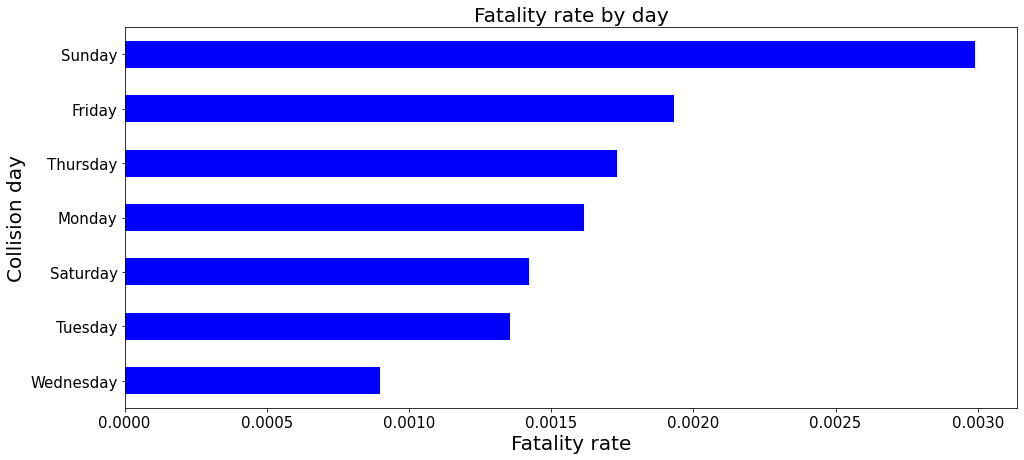

In [10]:
grp = df.groupby('collision_day')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Collision day', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 
plt.title('Fatality rate by day', fontsize=20) 
plt.savefig('../image/fatality_by_day.png')

Text(0.5, 1.0, 'Fatality rate by day')

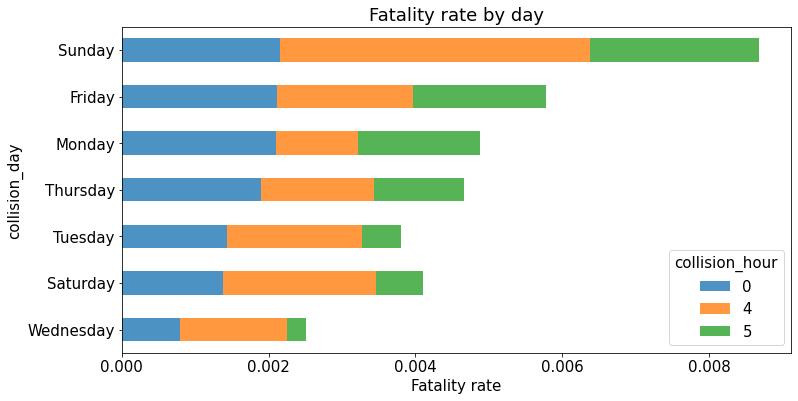

In [11]:
pvt = df.pivot_table('collision_classification', index = 'collision_day',
                         columns = 'collision_hour', aggfunc = 'mean')
pvt.sort_values(by =[0]).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.xlabel('Fatality rate')
plt.title('Fatality rate by day')

# 4. Fatality rate by environment

Text(0.5, 0, 'Fatality rate')

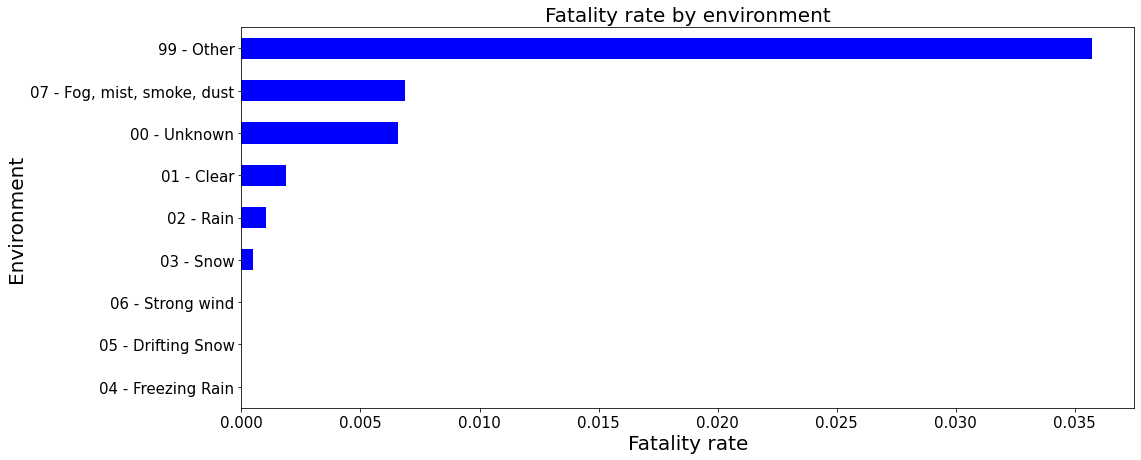

In [16]:
grp = df.groupby('environment')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Environment', fontsize=20)
plt.title('Fatality rate by environment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 

# 5. Fatality rate by impact type

Text(0.5, 0, 'Fatality rate')

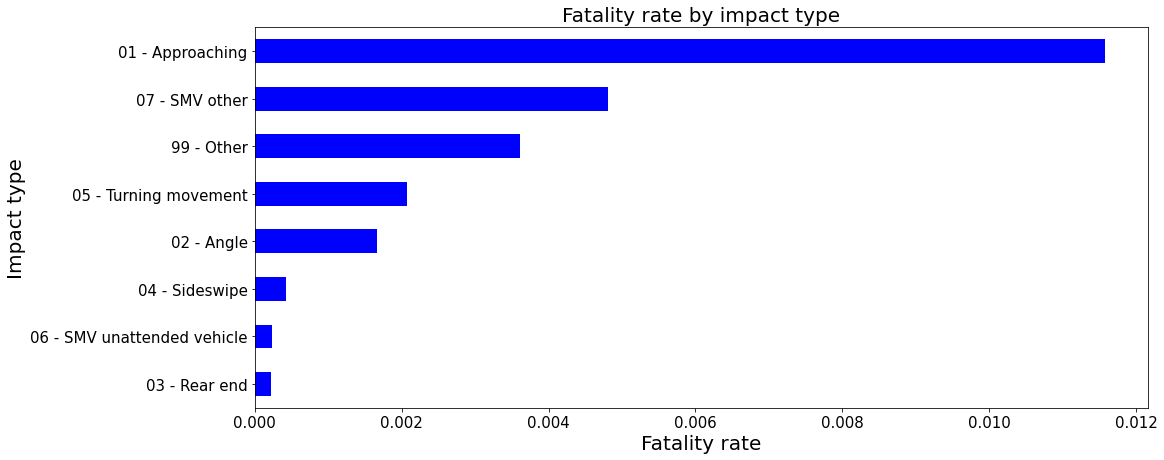

In [13]:
grp = df.groupby('impact_type')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Impact type', fontsize=20)
plt.title('Fatality rate by impact type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 

# 6. Fatality rate by surface condition

Text(0.5, 0, 'Fatality rate')

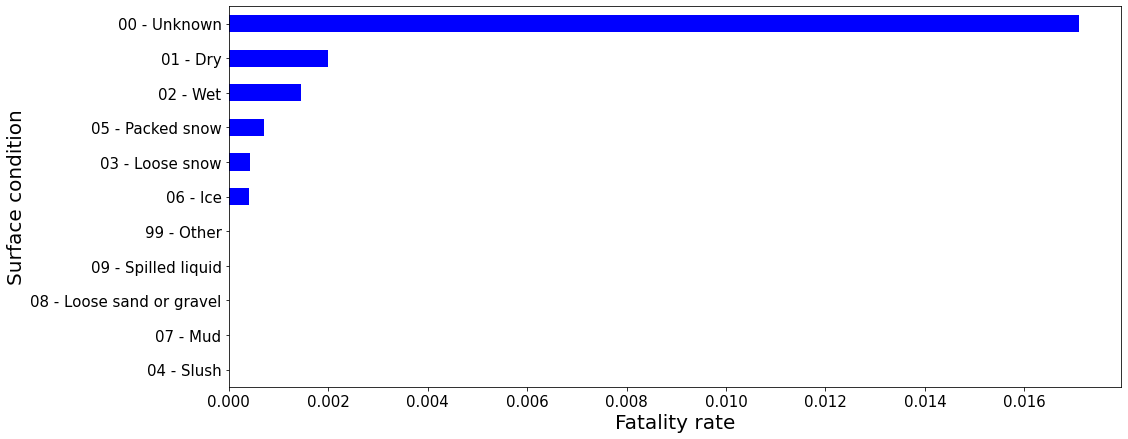

In [14]:
grp = df.groupby('surface_condition')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Surface condition', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 

# 7. Fatality rate by traffic control

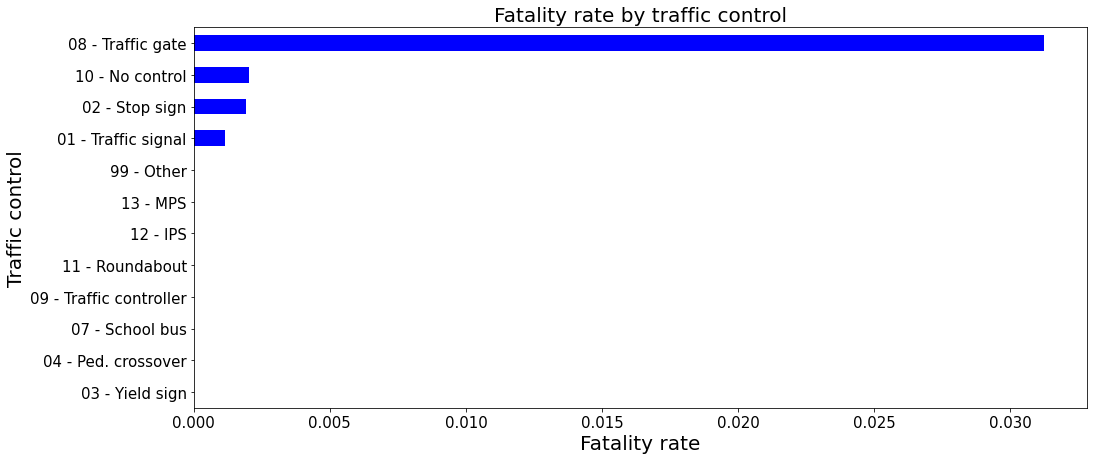

In [15]:
grp = df.groupby('traffic_control')['collision_classification'].mean().sort_values(ascending = True)
grp.plot(kind = 'barh', figsize=(16,7), color = 'b')
plt.ylabel('Traffic control', fontsize=20)
plt.title('Fatality rate by traffic control', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20) 
plt.savefig('../image/fatality_by_traf.png')

# Save data as csv

In [10]:
df.drop(['longitude', 'latitude', 'date', 'location', 'fid'], axis = 1, inplace = True)
df.to_csv('../data/binary_class_data.csv', index = False)